In [28]:
#MAKING NECESSARY IMPORTS 
#This project follows an exploratory data analysis (EDA) pipeline 
import os
import warnings
import math
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pylab import rcParams
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split 
from sklearn import linear_model
from sklearn.metrics import recall_score, precision_score, classification_report, accuracy_score, confusion_matrix, roc_curve, auc


from sklearn.metrics import confusion_matrix

from sklearn.metrics import ConfusionMatrixDisplay  # Correct import
from sklearn.preprocessing import StandardScaler, normalize
from scipy import ndimage
import seaborn as sns

train_data=pd.read_csv("exoTrain.csv")
test_data=pd.read_csv("exoTest.csv")
# train_data.info()
train_data


,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5082,1,-91.91,-92.97,-78.76,-97.33,-68.00,-68.24,-75.48,-49.25,-30.92,...,139.95,147.26,156.95,155.64,156.36,151.75,-24.45,-17.00,3.23,19.28
5083,1,989.75,891.01,908.53,851.83,755.11,615.78,595.77,458.87,492.84,...,-26.50,-4.84,-76.30,-37.84,-153.83,-136.16,38.03,100.28,-45.64,35.58
5084,1,273.39,278.00,261.73,236.99,280.73,264.90,252.92,254.88,237.60,...,-26.82,-53.89,-48.71,30.99,15.96,-3.47,65.73,88.42,79.07,79.43
5085,1,3.82,2.09,-3.29,-2.88,1.66,-0.75,3.85,-0.03,3.28,...,10.86,-3.23,-5.10,-4.61,-9.82,-1.50,-4.65,-14.55,-6.41,-2.55


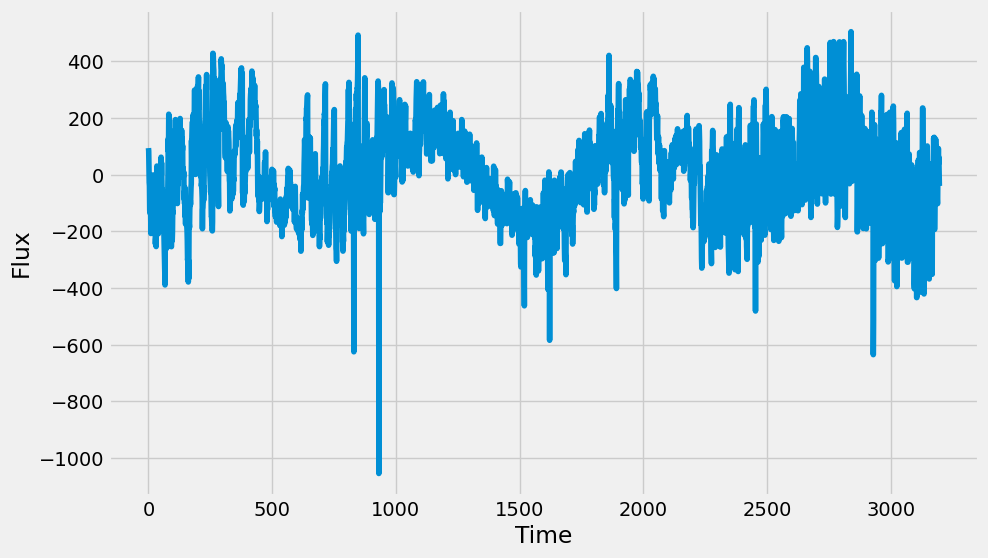

In [29]:
#VISUALISING DATA 
sample_index = 0
flux_values = train_data.iloc[sample_index, 1:].values  

plt.figure(figsize=(10, 6))
plt.plot(flux_values)
plt.xlabel("Time")
plt.ylabel("Flux")
plt.show()

In [30]:
#INSPECTING/CLEANING/PREPROCESSING DATA 

# print(df.isnull().values.any()) #CHECKING FOR NULL VALUES 
train_data['LABEL'] = pd.to_numeric(train_data['LABEL'], errors='coerce')
train_data['LABEL'] =train_data['LABEL'].map({1: 0, 2: 1}) #CONVERTING THE VALUES OF LABEL(1 FOR NON EXO PLANET 2 FOR EXOPLANET) TO BINARY VALUES SINCE ITS EASIER FOR THE MACHINE TO UNDERSTAND THAT WAY
# print(train_data.head(25))
# print(train_data.describe())   #GENERAL STATS
test_data['LABEL'] =test_data['LABEL'].map({1: 0, 2: 1})
train_data['LABEL'].value_counts()#JUST LIKE A MAP IN CPP IT RETURNS THE FREQUENCY OF VALUES ,IN THIS CASE IT RETURNS EXOPLANETS VS NON EXOPLANETS


LABEL
0    5050
1      37
Name: count, dtype: int64

([<matplotlib.axis.XTick at 0x1f41ad5f9e0>,
 [Text(0, 0, 'Non-Exoplanet (0)'), Text(1, 0, 'Exoplanet (1)')])

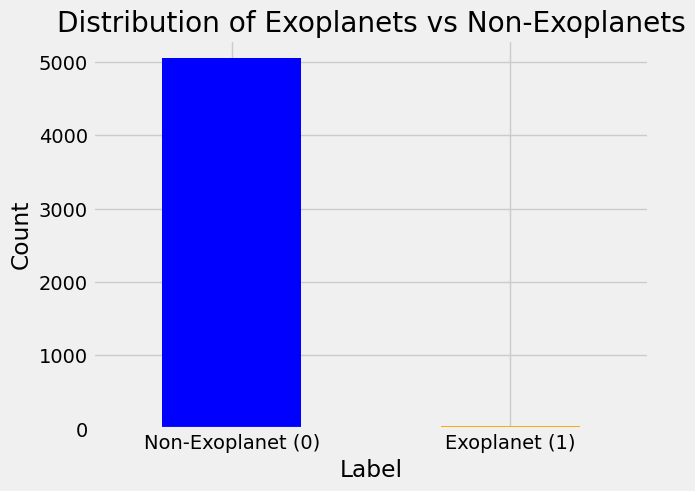

In [31]:
label_counts = train_data['LABEL'].value_counts()
label_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Distribution of Exoplanets vs Non-Exoplanets')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-Exoplanet (0)', 'Exoplanet (1)'], rotation=0)

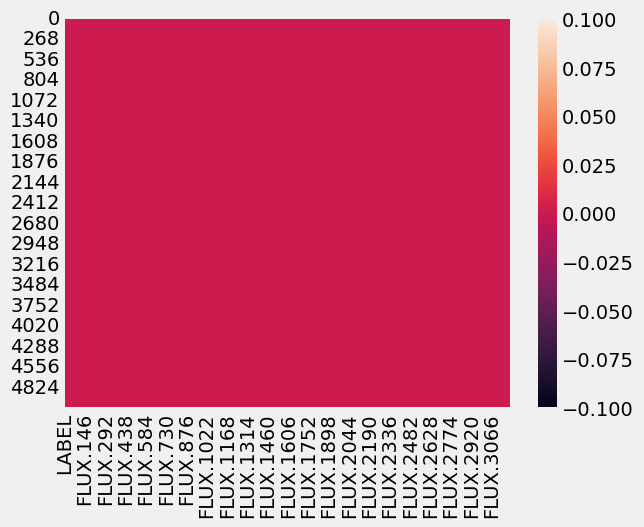

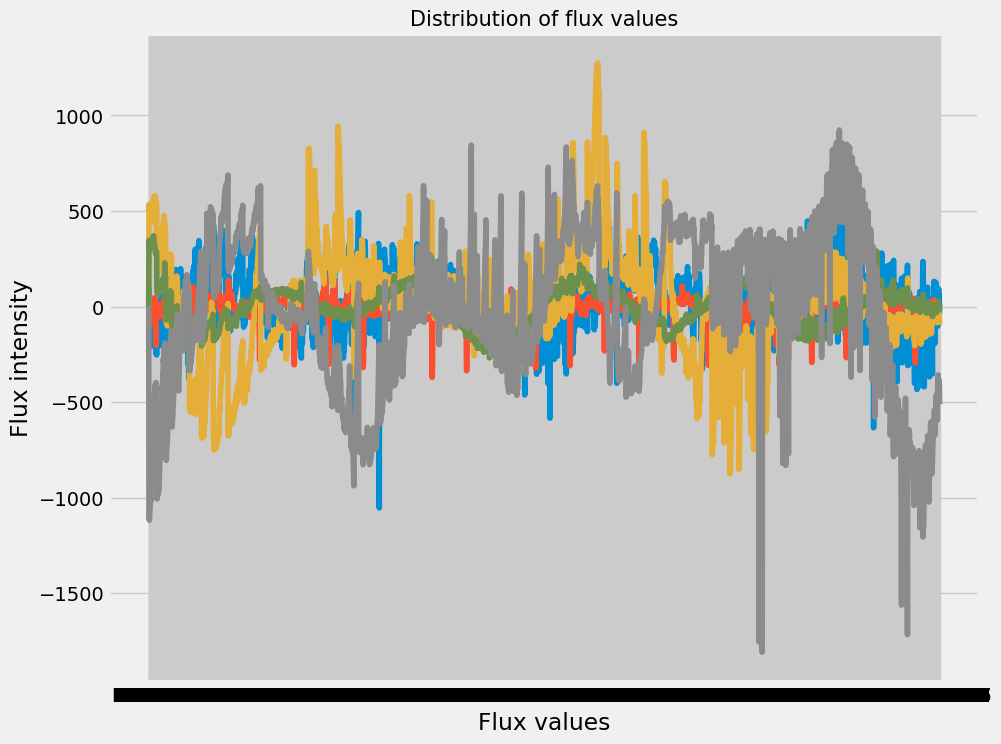

In [32]:
#IF YOU SEE A HIGHLY UNEVEN GRAPH YOURE ON THE RIGHT TRACK, YOURE GONNA HAVE TO SAMPLE THE DATA
#https://www.youtube.com/watch?v=y5M2hD6nzeE (VIDEO TO REVISE SAMPLING CONCEPTS)
sns.heatmap(train_data.isnull()) # this is gonna plot heatmap of missing values (we dont have any so it should be of a single color throughout)
#now we'll plot a distribution map only of the first 5 values
plt.figure(figsize=(10,8))
plt.title('Distribution of flux values', fontsize=15)
plt.xlabel('Flux values')
plt.ylabel('Flux intensity')
plt.plot(train_data.iloc[0,])
plt.plot(train_data.iloc[1,])
plt.plot(train_data.iloc[2,])
plt.plot(train_data.iloc[3,])
plt.plot(train_data.iloc[4,])
plt.show()

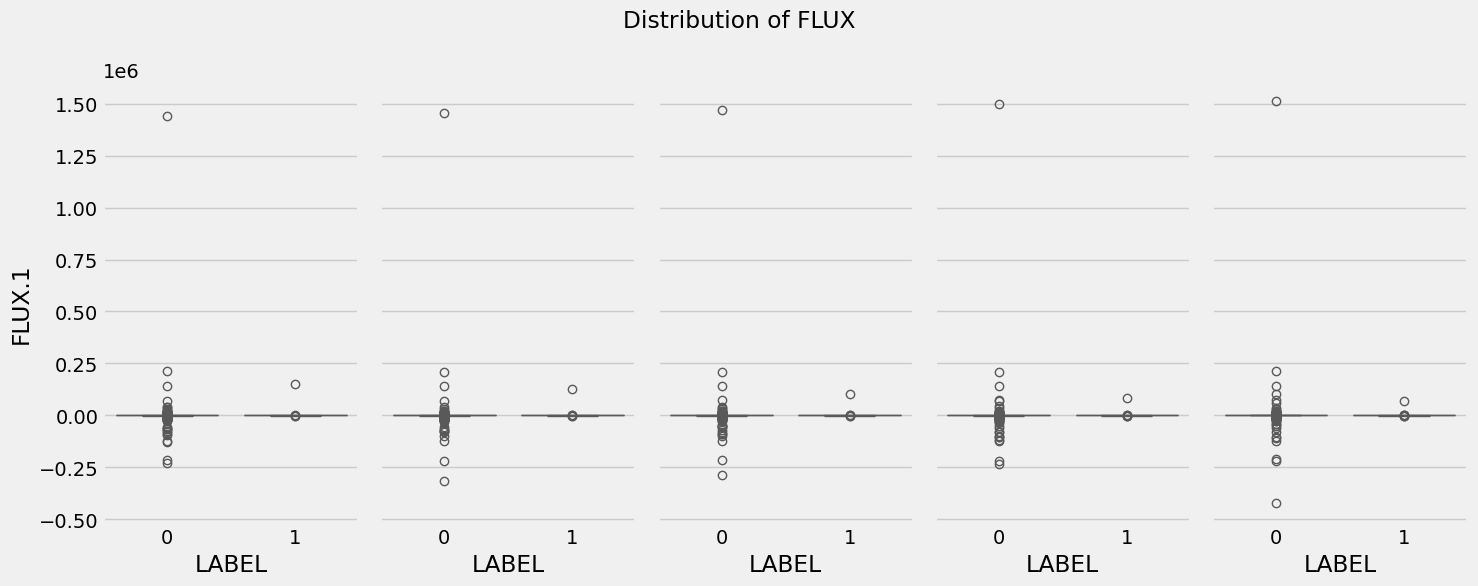

In [33]:
#VISUALISING OUTLIERS USING BOXPLOT
fig, axes = plt.subplots(1, 5, figsize=(15, 6), sharey=True)
fig.suptitle('Distribution of FLUX')

sns.boxplot(ax=axes[0], data=train_data, x='LABEL', y='FLUX.1', hue='LABEL', palette="Set2", legend=False)
sns.boxplot(ax=axes[1], data=train_data, x='LABEL', y='FLUX.2', hue='LABEL', palette="Set2", legend=False)
sns.boxplot(ax=axes[2], data=train_data, x='LABEL', y='FLUX.3', hue='LABEL', palette="Set2", legend=False)
sns.boxplot(ax=axes[3], data=train_data, x='LABEL', y='FLUX.4', hue='LABEL', palette="Set2", legend=False)
sns.boxplot(ax=axes[4], data=train_data, x='LABEL', y='FLUX.5', hue='LABEL', palette="Set2", legend=False)

plt.tight_layout()
plt.show()


In [34]:
from scipy.ndimage import gaussian_filter
from sklearn.preprocessing import  normalize

# Remove rows with high flux value
train_data.drop(train_data[train_data['FLUX.1'] > 250000].index, axis=0, inplace=True)









In [35]:
x_train = train_data.drop(["LABEL"],axis=1)
y_train = train_data["LABEL"]   
x_test = test_data.drop(["LABEL"],axis=1)
y_test = test_data["LABEL"]



In [36]:
# Normalize the feature data
x_train = normalize(x_train)
x_test = normalize(x_test)

In [37]:

# Apply Gaussian filter to smooth the feature data
x_train = gaussian_filter(x_train, sigma=10)
x_test = gaussian_filter(x_test, sigma=10)

In [38]:
#IDENTIFYING OUTLIERS USING IQR
#IQR IS Q3-Q1 (75TH PERCENTILE - 25TH PERCENTILE)
# Once you have IQR you can find upper and lower limit by removing this formula,
# lower_limit = Q1-1.5*IQR
# upper_limit = Q3 +1.5*IQR

# Q1 =train_data.iloc[:, 1:].quantile(0.25)  # First Quartile
# Q3 = train_data.iloc[:, 1:].quantile(0.75)  # Third Quartile
# IQR = Q3 - Q1
# outliers = (train_data.iloc[:, 1:] < (Q1 - 1.5 * IQR)) | (train_data.iloc[:, 1:] > (Q3 + 1.5 * IQR))
# print(outliers.sum())

#FEATURE SCALING -USING Z-score normalization  
#NOTE THAT Z-SCORE IS PREFFERED IF your data has outliers
std_scaler = StandardScaler()
x_train_scaled= std_scaler.fit_transform(x_train)
x_test_scaled= std_scaler.transform(x_test)



y_train unique labels: {0, 1}
y_test unique labels: {0, 1}
Validation accuracy of KNN is 0.9912280701754386

Classification report :
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       565
           1       0.00      0.00      0.00         5

    accuracy                           0.99       570
   macro avg       0.50      0.50      0.50       570
weighted avg       0.98      0.99      0.99       570



Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

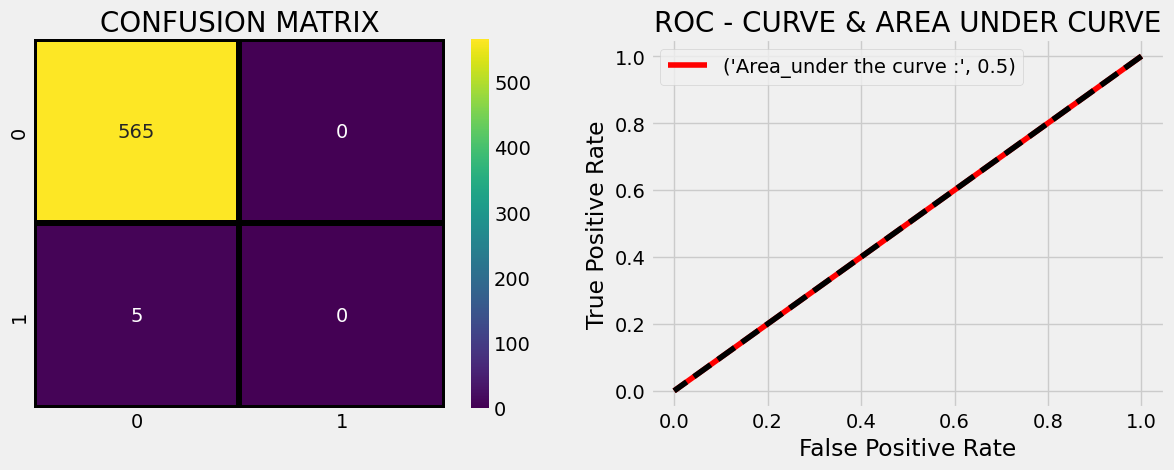

In [45]:
# X = df_normalized  # Features after normalization
# y = df_cleaned.iloc[:, 0]  # Assuming the first column is the target
# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #splitting the data into training and testing sets
#training the model here 
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
# print(x_train.shape, y_train.shape)
print("y_train unique labels:", set(y_train))
print("y_test unique labels:", set(y_test))

knn_model.fit(x_train_scaled,y_train)
prediction=knn_model.predict(x_test_scaled)
print('Validation accuracy of KNN is', accuracy_score(prediction,y_test))
print ("\nClassification report :\n",(classification_report(y_test,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test,prediction),annot=True,cmap="viridis",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

#ROC curve and Area under the curve plotting
predicting_probabilites = knn_model.predict_proba(x_test)[:,1]
fpr,tpr,thresholds = roc_curve(y_test,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)

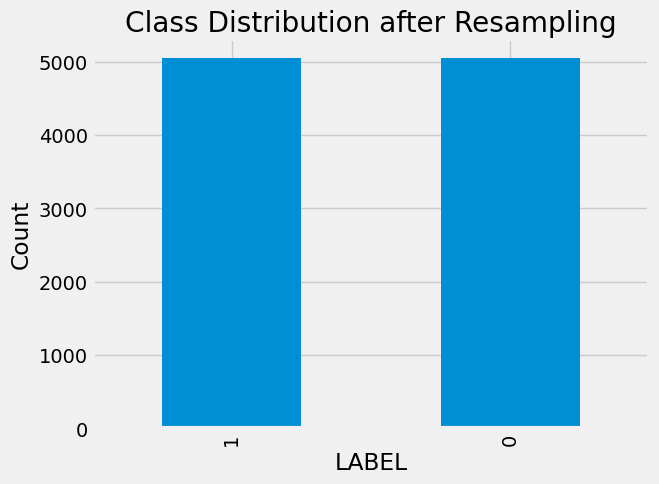

In [50]:
#SINCE WE ARE DEALING WITH AN IMBALANCED DATA  WE USE AN OVERSAMPLING TECHNIQUE CALLED SMOTE(Synthetic Minority Oversampling Technique) 
#REFER https://www.youtube.com/watch?v=U3X98xZ4_no
from imblearn.over_sampling import SMOTE
model = SMOTE()

ov_train_x, ov_train_y = model.fit_resample(train_data.drop('LABEL', axis=1), train_data['LABEL'])
ov_train_y = ov_train_y.astype('int')

value_counts = ov_train_y.value_counts().reset_index()
value_counts.columns = ['LABEL', 'Count']  # Rename columns for clarity

value_counts.plot(kind='bar', x='LABEL', y='Count', legend=False)
plt.xlabel('LABEL')
plt.ylabel('Count')
plt.title('Class Distribution after Resampling')
plt.show()


In [51]:
#SPLIT THE DATASET AGAIN 
train_X, test_X, train_y, test_y = train_test_split(ov_train_x, ov_train_y, test_size=0.33, random_state=42)



Validation accuracy of KNN is 0.9822982298229823

Classification report :
               precision    recall  f1-score   support

           0       1.00      0.97      0.98      1709
           1       0.96      1.00      0.98      1624

    accuracy                           0.98      3333
   macro avg       0.98      0.98      0.98      3333
weighted avg       0.98      0.98      0.98      3333



Text(0.5, 1.0, 'ROC - CURVE & AREA UNDER CURVE')

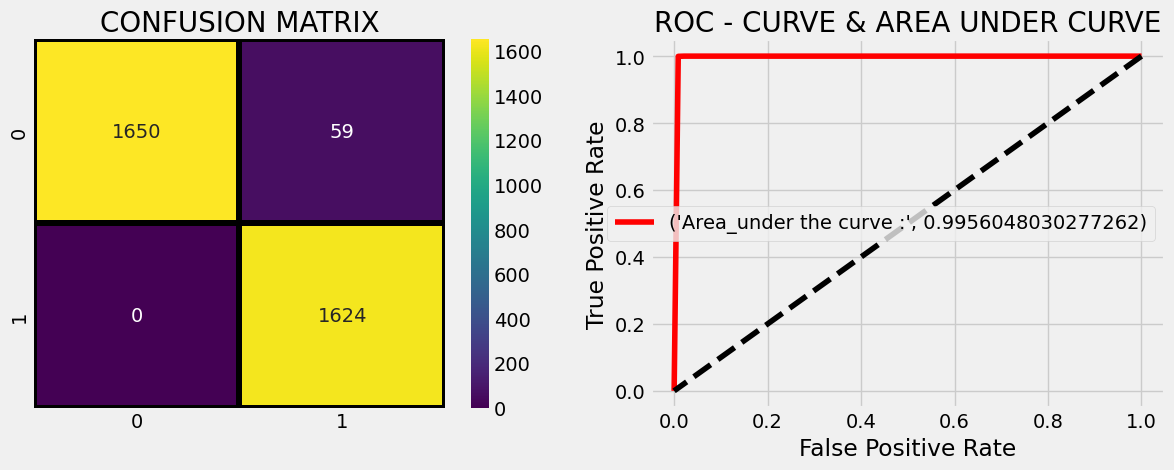

In [52]:
#DEPLOY THE MODEL AGAIN
knn_model = KNeighborsClassifier()

knn_model.fit(train_X,train_y)

prediction=knn_model.predict(test_X)

print('Validation accuracy of KNN is', accuracy_score(prediction,test_y))
print ("\nClassification report :\n",(classification_report(test_y,prediction)))

#Confusion matrix
plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(test_y,prediction),annot=True,cmap="viridis",fmt = "d",linecolor="k",linewidths=3)
plt.title("CONFUSION MATRIX",fontsize=20)

#ROC curve and Area under the curve plotting
predicting_probabilites = knn_model.predict_proba(test_X)[:,1]
fpr,tpr,thresholds = roc_curve(test_y,predicting_probabilites)
plt.subplot(222)
plt.plot(fpr,tpr,label = ("Area_under the curve :",auc(fpr,tpr)),color = "r")
plt.plot([1,0],[1,0],linestyle = "dashed",color ="k")
plt.legend(loc = "best")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC - CURVE & AREA UNDER CURVE",fontsize=20)